# Lesson 1 - Resistance 1DOF Surge Motion

## Equation of Motion

In [1]:
# import required libraries
import math as math
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
# Constant Parameters
Lpp   = 178
B     = 32.26
d     = 11.57
Cb    = 0.84
A_wet = 8750
nu_w  = 1.1883e-6
rho_w = 1025
K     = 0.37

mx_ND = 0.08
m     = rho_w*Lpp*B*d*Cb
mx    = mx_ND*m

In [3]:
# Hull Reaction Forces (Resistance) Calculation
def hull_force(x):
    uvel = x[1]
    U    = uvel
    Re   = U*Lpp/nu_w
    C_F0 = 0.463*(math.log10(Re))**(-2.6)
    R    = C_F0 * (0.5*rho_w*A_wet*U**2)*(1+K)
    tau_hull = -R
    return tau_hull

In [4]:
# Combine Forces and ODEs
def state_fun(x):
    u = x[1]
    tau_hull = hull_force(x)
    tau_surge = tau_hull
    
    xpos_dot = u
    uvel_dot = tau_surge/(m+mx)
    x_dot = np.array([xpos_dot, uvel_dot])
    return x_dot

In [5]:
def euler(x,dt):
    state_next = x + dt*state_fun(x)
    return state_next

In [6]:
def RKGill(x,dt):
    k1  = state_fun(x)
    tmp = x + 0.5*dt*k1
    
    k2  = state_fun(tmp)
    tmp = x + 0.5*dt*(math.sqrt(2)-1)*k1 + dt*(1-(1/math.sqrt(2)))*k2
    
    k3  = state_fun(tmp)
    tmp = x - 0.5*dt*math.sqrt(2)*k2 + dt*(1+(1/math.sqrt(2)))*k3
    
    k4  = state_fun(tmp)
    state_next = x + dt*(k1+(2-math.sqrt(2))*k2+(2+math.sqrt(2))*k3+k4)/6
    return state_next

In [7]:
def simulate(x0,t0,tf,dt):
    print("Simulation Start!")
    x = x0
    t_vec = np.arange(t0,tf,dt)
    xpos = np.zeros(t_vec.size)
    uvel = np.zeros(t_vec.size)
    idx = 0
    for i in t_vec:
#         state_next = euler(x,dt)
        state_next = RKGill(x,dt)
        x = state_next
        xpos[idx] = x[0]
        uvel[idx] = x[1]
        idx += 1
    print("Simulation Finished!")
    plot(t_vec,xpos,uvel)

In [8]:
# Plot
def plot(t_vec,xpos,uvel):
    fig, ax1 = plt.subplots()
    ax1.plot(t_vec, xpos)
    ax1.set(xlabel='time (s)', ylabel='X (m)',
           title='Timeseries of X Position')
    ax1.grid()
    
    fig, ax2 = plt.subplots()
    ax2.plot(t_vec, uvel)
    ax2.set(xlabel='time (s)', ylabel='u (m/s)',
            title='Timeseries of Surge Velocity')
    ax2.grid()
    fig.savefig("test.png")
    plt.show()

Simulation Start!
Simulation Finished!


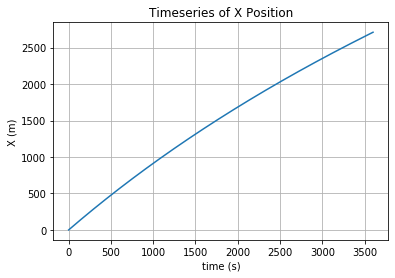

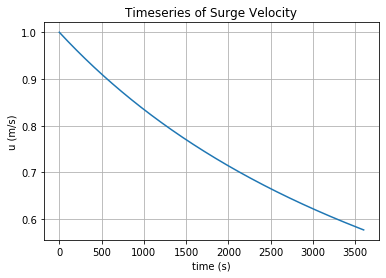

cpuTime: 86.88 sec


In [9]:
# Initial Conditions
uvel0 = 1
xpos0 = 0
x0 = np.array([xpos0, uvel0])

# Simulate
t_start = time.time()
simulate(x0,0,3600,0.001)
t_end   = time.time()
cpuTime = round(t_end - t_start,2)
print("cpuTime:",cpuTime, "sec")

In [10]:
cpuTime = round(t_end - t_start,2)
print("cpuTime: ",cpuTime, "sec")

cpuTime:  86.88 sec
